In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris=load_iris()
X=iris.data
y=iris.target

In [3]:
mask=(y==0) | (y==1)  # 0:Setosa, 1:Versicolor
X, y=X[mask], y[mask]


In [4]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices=np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx=int(X.shape[0]*(1-test_size))
    X_train, X_test=X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test=y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [5]:
def calculate_entropy(y):
    counts=np.bincount(y)
    probabilities=counts/len(y)
    return -np.sum([p*np.log2(p) for p in probabilities if p > 0])


In [6]:
def information_gain(y, y_left, y_right):
    parent_entropy=calculate_entropy(y)
    left_entropy=calculate_entropy(y_left)
    right_entropy=calculate_entropy(y_right)
    
    weight_left=len(y_left)/len(y)
    weight_right=len(y_right)/len(y)
    
    return parent_entropy-(weight_left*left_entropy+weight_right*right_entropy)
 

In [7]:
def best_split(X, y):
    best_gain=-1  
    best_feature=None
    best_threshold=None
    
    for feature in range(X.shape[1]):  
        thresholds=np.unique(X[:, feature])  #Identifies all unique values in the possible split while removing duplicates
        for threshold in thresholds:
            left_mask=X[:, feature]<=threshold 
            right_mask=~left_mask  
            y_left, y_right=y[left_mask], y[right_mask]
            
            if len(y_left)==0 or len(y_right)==0:
                continue 
            
            gain=information_gain(y, y_left, y_right)
            if gain>best_gain:  
                best_gain=gain
                best_feature=feature
                best_threshold=threshold
    
    return best_feature, best_threshold


In [8]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature=feature
        self.threshold=threshold
        self.left=left
        self.right=right
        self.value=value

def build_tree(X, y, max_depth, depth=0):
    if len(set(y))==1 or depth==max_depth:
        return Node(value=np.bincount(y).argmax())
    
    feature, threshold=best_split(X, y)
    if feature is None:
        return Node(value=np.bincount(y).argmax())
    
    left_mask=X[:, feature]<=threshold
    right_mask=~left_mask
    left_child=build_tree(X[left_mask], y[left_mask], max_depth, depth+1)
    right_child=build_tree(X[right_mask], y[right_mask], max_depth, depth+1)
    
    return Node(feature, threshold, left_child, right_child)


In [9]:
def predict_single_instance(x, tree):
    if tree.value is not None:
        return tree.value
    
    if x[tree.feature]<=tree.threshold:
        return predict_single_instance(x, tree.left)
    else:
        return predict_single_instance(x, tree.right)

def predict_decision_tree(X, tree):
    return np.array([predict_single_instance(x, tree) for x in X])


In [14]:
tree_3=build_tree(X_train, y_train, max_depth=3)

y_train_pred_3=predict_decision_tree(X_train, tree_3)
y_test_pred_3=predict_decision_tree(X_test, tree_3)

train_accuracy_3=np.mean(y_train_pred_3==y_train)
test_accuracy_3=np.mean(y_test_pred_3==y_test)

print(f"Train Accuracy: {train_accuracy_3:.2f}")
print(f"Test Accuracy: {test_accuracy_3:.2f}")


Train Accuracy: 1.00
Test Accuracy: 1.00


In [15]:
tree_5=build_tree(X_train, y_train, max_depth=5)

y_train_pred_5=predict_decision_tree(X_train, tree_5)
y_test_pred_5=predict_decision_tree(X_test, tree_5)

train_accuracy_5=np.mean(y_train_pred_5==y_train)
test_accuracy_5=np.mean(y_test_pred_5==y_test)

print(f"Train Accuracy: {train_accuracy_5:.2f}")
print(f"Test Accuracy: {test_accuracy_5:.2f}")


Train Accuracy: 1.00
Test Accuracy: 1.00


In [16]:
tree_10=build_tree(X_train, y_train, max_depth=10)

y_train_pred_10=predict_decision_tree(X_train, tree_10)
y_test_pred_10=predict_decision_tree(X_test, tree_10)

train_accuracy_10=np.mean(y_train_pred_10==y_train)
test_accuracy_10=np.mean(y_test_pred_10==y_test)

print(f"Train Accuracy: {train_accuracy_10:.2f}")
print(f"Test Accuracy: {test_accuracy_10:.2f}")


Train Accuracy: 1.00
Test Accuracy: 1.00


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf=DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_train_sklearn=clf.predict(X_train)
y_test_sklearn=clf.predict(X_test)

print(f"Scikit-Learn Train Accuracy: {accuracy_score(y_train, y_train_sklearn):.2f}")
print(f"Scikit-Learn Test Accuracy: {accuracy_score(y_test, y_test_sklearn):.2f}")


Scikit-Learn Train Accuracy: 1.00
Scikit-Learn Test Accuracy: 1.00


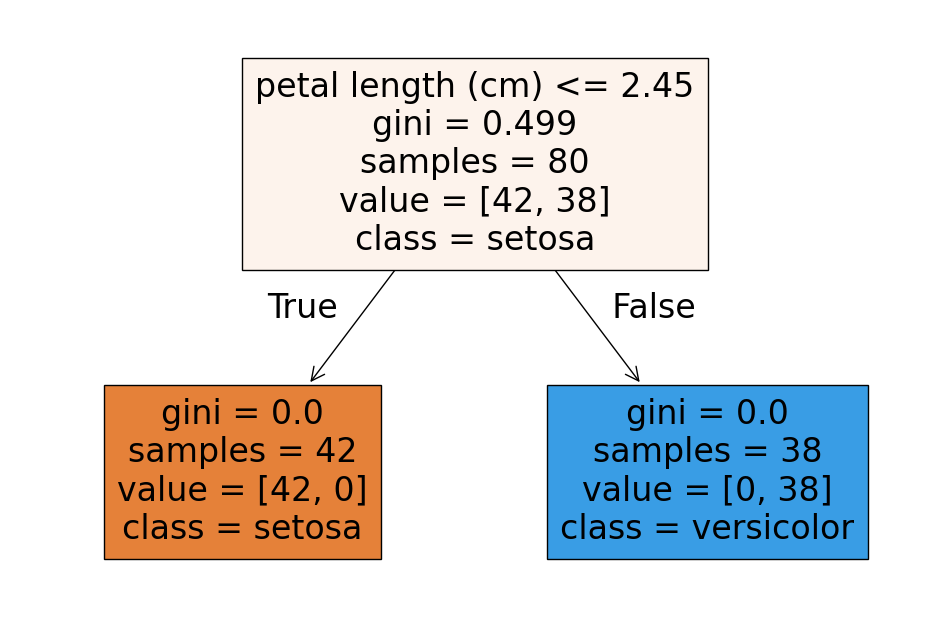

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names[:2], filled=True)
plt.show()


In [ ]:
#If the tree is too shallow then the entire data cannot be captured properly which leads to underfitting which leads to low training and test accuracy
#If the tree is too large then it leads to overfitting because even minor variations are caputed leading to high training accuracy but low test accuracy


#Decision trees are simple to understand as they are just a split based on yes and no conditions.They do not follow any particular data distribution and they rand features based on importance
#Decision trees are prone to underfitting and overfitting and they are not optimal for continous data


